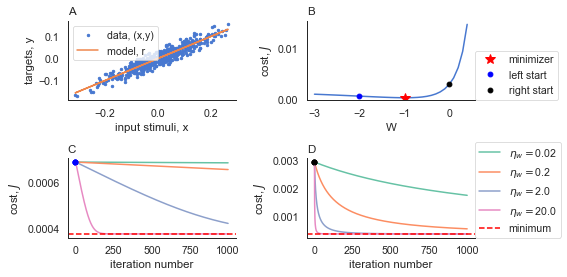

In [6]:
####### Calculation packages
####### 

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import pinv
import math
import random

####### Plotting packages
####### 

import seaborn as sns
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.colors import LogNorm
from matplotlib.ticker import FixedLocator, FixedFormatter, FormatStrFormatter

####### Formatting packages
####### 

import warnings
from time import time as tm
#from google.colab import files

####### self-defined packages
####### 
from HelperFuns import *

np.random.seed(2023)


####### General Parameter Setting
####### 

W_hat = -1#7      # true parameter W, used to generate data
G = np.eye(1)     # a 1 by 1 matrix with g = 1
m = 500           # sample size
sigma_x = 0.1     # scale of X
sigma_r = 0.01*2  # noise 

A_hat = inv(inv(G)- W_hat)           # linear coefficient parameter A
X_1d = sigma_x*np.random.randn(m,1)  # external input
# without adding the noise, it would be completely linear (then nothing to learn)!
r_hat = A_hat@X_1d.T+sigma_r*np.random.randn(1,m) 


####### Plotting
sns.set(context='paper',style='white',font_scale=1.2,rc={"lines.linewidth":1.5})
sns.set_palette('muted')
####### 

plt.subplots(figsize=(8,4))
plt.subplot(2,2,1)
plt.plot(X_1d,r_hat[0,:],'.', label='data, (x,y)')

x = X_1d[:,0]
y = r_hat[0,:]
k, b = np.polyfit(x,y, 1) # fit the noisy data with a line
plt.plot(x, k*x + b, label= 'model, r')
plt.xlabel('input stimuli, x')
plt.ylabel('targets, y')
# plt.legend(bbox_to_anchor=(0.05,1), loc="center left", fontsize =  'small')
plt.legend()
plt.title('A',loc='left')
plt.tight_layout()
# plt.savefig('./Figures/Fig1A.eps',bbox_inches="tight")
sns.despine()


##### loss curve
plt.subplot(2,2,2)
Wcandidate = np.arange(-3, 0.5, 0.1)
Wcost = np.zeros(len(Wcandidate))
for j in range(len(Wcandidate)):
    Wcost[j] = minimumCost(Wcandidate[j], G, X_1d, r_hat)
plt.plot(Wcandidate, Wcost)
##### minimum loss
W_1d_star = 1/G - (1/((r_hat@X_1d)*(1/(X_1d.T@X_1d))))
plt.plot(W_1d_star, 
         minimumCost(W_1d_star, G, X_1d, r_hat),
         '*', color = "red", markersize=10,
         label= 'minimizer')

##### initials
plt.plot(-2, minimumCost(-2, G, X_1d, r_hat), 'o', color = "blue", label = 'left start')
plt.plot(0, minimumCost(0, G, X_1d, r_hat), 'o', color = "black", label = 'right start')
plt.title('B',loc='left')
plt.xlabel('W')
plt.ylabel('cost, $J$')
plt.ylim(bottom=0)
# plt.legend(bbox_to_anchor=(0.5,1), loc="upper center", fontsize =  'small')
plt.legend(loc=[1.0,0])
plt.tight_layout()
sns.despine()
# plt.savefig('./Figures/Fig1B.eps',bbox_inches="tight")


### find solutions near the true W, take W_init from the left/right of optimum W
W_init_Left = -2
W_init_Right = 0
# Learning rate
eta_W = np.array([0.02,0.2,2,20]) # try several learning rates.
# trials
niterations = 1000

# initialized the loss
losses=np.zeros((len(eta_W), niterations+1))
####### uncomment if learn from the left/right #######  
losses[:, 0]=minimumCost(W_init_Left,G, X_1d,r_hat)
# losses[:, 0]=minimumCost(W_init_Right,G, X_1d,r_hat)

plt.subplot(2,2,3)
x = np.arange(0,niterations+1,1)
for i in range(len(eta_W)): 
####### uncomment if learn from the left/right ####### 
    W = W_init_Left
#     W = W_init_Right
    for j in range(niterations):
        A = inv(inv(G) - W)
        dJdW = -(2/m)*A.T@(A@X_1d.T-r_hat)@((A@X_1d.T).T)
        W = W+eta_W[i]*dJdW
        losses[i, j+1]=minimumCost(W, G, X_1d, r_hat)

    y = losses[i,:]
    plt.plot(x,y,label=r'$\eta_w = $' + str(eta_W[i]), color=sns.color_palette("Set2")[i])
####### uncomment if learn from the left/right ####### 
    plt.plot(W_init_Left, minimumCost(W_init_Left, G, X_1d,r_hat), 'o', color = "blue")
#     plt.plot(W_init_Right, minimumCost(W_init_Right, G, X_1d,r_hat), 'o', color = "black")x
plt.axhline(y=minimumCost((1/G - (1/((r_hat@X_1d)*(1/(X_1d.T@X_1d))))), G, X_1d,r_hat), 
            color='red', linestyle='--', label= 'minimum')
#plt.yscale('log')
####### uncomment if learn from the left/right ####### 
plt.title('C',loc='left')
# plt.title('D',loc='left',pad=10)
plt.xlabel('iteration number')
plt.ylabel('cost, $J$')
# plt.ylim(bottom=0)
# plt.legend(bbox_to_anchor=(0.8,0.5), loc="center", fontsize = "x-small")
plt.tight_layout()
sns.despine()
# plt.savefig('./Figures/Fig1C.eps',bbox_inches="tight")


plt.subplot(2,2,4)
# initialized the loss
losses=np.zeros((len(eta_W), niterations+1))
####### uncomment if learn from the left/right #######  
# losses[:, 0]=minimumCost(W_init_Left,G, X_1d,r_hat)
losses[:, 0]=minimumCost(W_init_Right,G, X_1d,r_hat)

# plot the gradient-based learning
x = np.arange(0,niterations+1,1)
for i in range(len(eta_W)): 
####### uncomment if learn from the left/right ####### 
#     W = W_init_Left
    W = W_init_Right
    for j in range(niterations):
        A = inv(inv(G) - W)
        dJdW = -(2/m)*A.T@(A@X_1d.T-r_hat)@((A@X_1d.T).T)
        W = W+eta_W[i]*dJdW
        losses[i, j+1]=minimumCost(W, G, X_1d, r_hat)

    y = losses[i,:]
    plt.plot(x,y,label=r'$\eta_w = $' + str(eta_W[i]), color=sns.color_palette("Set2")[i])
####### uncomment if learn from the left/right ####### 
#     plt.plot(W_init_Left, minimumCost(W_init_Left, G, X_1d,r_hat), 'o', color = "blue")
    plt.plot(W_init_Right, minimumCost(W_init_Right, G, X_1d,r_hat), 'o', color = "black")
plt.axhline(y=minimumCost((1/G - (1/((r_hat@X_1d)*(1/(X_1d.T@X_1d))))), G, X_1d,r_hat), 
            color='red', linestyle='--', label= 'minimum')
#plt.yscale('log')
####### uncomment if learn from the left/right ####### 
# plt.title('C',loc='left',pad=10)
plt.title('D',loc='left')
plt.xlabel('iteration number')
plt.ylabel('cost, $J$')
plt.tight_layout()
plt.legend(loc=[1.0,0])
sns.despine()
# plt.savefig('./Figures/Fig1D.eps',bbox_inches="tight")

plt.savefig('./Figures/Linear1DLossdW1.pdf')
# plt.show()

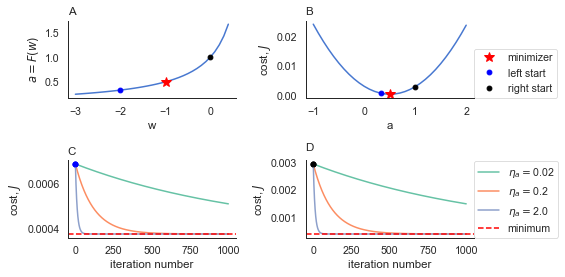

In [7]:
##### Ploting
sns.set(context='paper',style='white',font_scale=1.2,rc={"lines.linewidth":1.5})
sns.set_palette('muted')
####### 

plt.subplots(figsize=(8,4))
plt.subplot(2,2,1)

# loss relationship between W and A
plt.plot(Wcandidate, 1/(1-Wcandidate))
plt.plot(W_init_Left, 1/(1-(W_init_Left)), 'o', color = "blue", label = 'left start')
plt.plot(0, 1/(1-W_init_Right), 'o', color = "black",label = 'right start')

# minimum loss w.r.t. W
plt.plot(W_1d_star, 
         1/(1-W_1d_star),
         '*', color = "red", markersize=10,
         label= 'minimizer')
plt.title('A',loc='left')
plt.ylabel(r'$a = F(w)$')
plt.xlabel('w')
# plt.legend(bbox_to_anchor=(0.5,0.8), loc="center", fontsize = "small")
# plt.legend()
# plt.savefig('./Figures/Fig2A.eps',bbox_inches="tight")
# plt.legend(loc=[1.0,0])
sns.despine()



plt.subplot(2,2,2)
# loss w.r.t. A landscape
Acandidate = np.arange(-1, 2+0.1, 0.1) 
Acost = np.zeros(len(Acandidate))
for j in range(len(Acandidate)):
    Acost[j] = minimumCostA(Acandidate[j],X_1d, r_hat)
plt.plot(Acandidate, Acost)

# minimum loss in for both landscape
W_1d_star = 1/G - (1/((r_hat@X_1d)*(1/(X_1d.T@X_1d))))
A_1d_star = r_hat@X_1d@(inv(X_1d.T@X_1d))
plt.plot(A_1d_star, 
         minimumCostA(A_1d_star, X_1d, r_hat),
         '*', color = "red", markersize=10,
         label= 'minimizer')
# initial loss
plt.plot((inv(inv(G) - (W_init_Left))), minimumCostA((inv(inv(G) - W_init_Left)), X_1d, r_hat), 
         'o', color = "blue", label = 'left start')
plt.plot((inv(inv(G) - W_init_Right)), minimumCostA((inv(inv(G) - W_init_Right)), X_1d, r_hat), 
          'o', color = "black", label = 'right start')
plt.title('B',loc='left')
plt.ylabel('cost, $J$')
plt.xlabel('a')
# plt.legend(bbox_to_anchor=(0.8,0.8), loc="center", fontsize = "small")
plt.legend(loc = [1.0,0])
# plt.savefig('./Figures/Fig2B.eps',bbox_inches="tight")
sns.despine()



plt.subplot(2,2,3)
# find solutions near True A,
A_init_Left = (inv(inv(G) - (W_init_Left)))
A_init_Right = (inv(inv(G) - (W_init_Right)))
# Learning rate
eta_A = np.array([0.02,0.2,2])
# Trials
niterations = 1000
# initialized the loss
losses=np.zeros((len(eta_A), niterations+1))
####### uncomment if learn from the left/right ####### 
losses[:, 0]=minimumCostA(A_init_Left,X_1d,r_hat)
# losses[:, 0]=minimumCostA(A_init_Right,X_1d,r_hat)

x = np.arange(0,niterations+1,1)
for i in range(len(eta_A)): 
####### uncomment if learn from the left/right #######    
    A = A_init_Left
#     A = A_init_Right
    for j in range(niterations):
        dJdA = -(2/m)*(A@X_1d.T-r_hat)@X_1d
        A = A+eta_A[i]*dJdA
        losses[i, j+1]=minimumCostA([A], X_1d, r_hat)

    y = losses[i,:]
    plt.plot(x,y,label=r'$\eta_a = $' + str(eta_A[i]), color=sns.color_palette("Set2")[i])
####### uncomment if learn from the left/right ####### 
    plt.plot(A_init_Left, minimumCostA([A_init_Left], X_1d,r_hat), 'o', color = "blue")
#     plt.plot(A_init_Right, minimumCostA([A_init_Right], X_1d,r_hat), 'o', color = "black")
plt.axhline(y=minimumCostA(A_1d_star, X_1d, r_hat), 
            color='red', linestyle='--', label='minimum')
# plt.yscale('log')
####### uncomment if learn from the left/right ####### 
plt.title('C',loc='left')
# plt.title('D',loc='left',pad=10)
plt.xlabel('iteration number')
plt.ylabel('cost, $J$')
# plt.ylim(bottom=0)
sns.despine()
# plt.legend(bbox_to_anchor=(0.8,0.5), loc="center", fontsize = "x-small")
# plt.savefig('./Figures/Fig2C.eps',bbox_inches="tight")


plt.subplot(2,2,4)
# initialized the loss
losses=np.zeros((len(eta_A), niterations+1))
####### uncomment if learn from the left/right ####### 
# losses[:, 0]=minimumCostA(A_init_Left,X_1d,r_hat)
losses[:, 0]=minimumCostA(A_init_Right,X_1d,r_hat)

x = np.arange(0,niterations+1,1)
for i in range(len(eta_A)): 
####### uncomment if learn from the left/right #######    
#     A = A_init_Left
    A = A_init_Right
    for j in range(niterations):
        dJdA = -(2/m)*(A@X_1d.T-r_hat)@X_1d
        A = A+eta_A[i]*dJdA
        losses[i, j+1]=minimumCostA([A], X_1d, r_hat)

    y = losses[i,:]
    plt.plot(x,y,label=r'$\eta_a = $' + str(eta_A[i]), color=sns.color_palette("Set2")[i])
####### uncomment if learn from the left/right ####### 
#     plt.plot(A_init_Left, minimumCostA([A_init_Left], X_1d,r_hat), 'o', color = "blue")
    plt.plot(A_init_Right, minimumCostA([A_init_Right], X_1d,r_hat), 'o', color = "black")
plt.axhline(y=minimumCostA(A_1d_star, X_1d, r_hat), 
            color='red', linestyle='--', label='minimum')
# plt.yscale('log')
####### uncomment if learn from the left/right ####### 
# plt.title('C',loc='left')
plt.title('D',loc='left',pad=10)
plt.xlabel('iteration number')
plt.ylabel('cost, $J$')
# plt.ylim(bottom=0)
plt.legend(loc = [1.0,0])
sns.despine()
# plt.legend(bbox_to_anchor=(0.8,0.5), loc="center", fontsize = "x-small")
# plt.savefig('./Figures/Fig2C.eps',bbox_inches="tight")

plt.tight_layout()
plt.savefig('./Figures/Linear1DLossdW2.pdf')

Time to generate gradient descent: 0.83 sec.
Time to generate gradient descent: 1.29 sec.


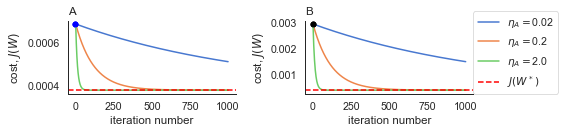

In [8]:
####### Plotting
sns.set(context='paper',style='white',font_scale=1.2,rc={"lines.linewidth":1.5})
sns.set_palette('muted')
####### 
plt.subplots(figsize=(8,2))
plt.subplot(1,2,1)

# Learning rate
eta_A = np.array([0.02, 0.2, 2])
# trials
niterations = int(1000)

losses=np.zeros((len(eta_A), niterations+1))
####### uncomment if learn from the left/right ####### 
losses[:, 0]=minimumCostA(A_init_Left,X_1d,r_hat)
# losses[:, 0]=minimumCostA(A_init_Right,X_1d,r_hat)

startW =tm() # time stamped
x = np.arange(0,niterations+1,1)
for i in range(len(eta_A)):
####### uncomment if learn from the left/right ####### 
    W = W_init_Left
#     W = W_init_Right
    A = inv(inv(G)- W)
    for j in range(niterations):        
        dJdA = dJdA = -(2/m)*(A@X_1d.T-r_hat)@X_1d
        A = A+eta_A[i]*dJdA
        dJdW = -(2*eta_A[i]*(inv(G)-W)**3/m)*(A@A@X_1d.T@X_1d-A@r_hat@X_1d)
        W = W + dJdW
        A = inv(inv(G) - W)
        losses[i, j+1]=minimumCostA(A, X_1d, r_hat)

    y = losses[i,:]
    
#     plt.yscale('log')
    plt.plot(x,y,label= r'$\eta_A = $' +  str(eta_A[i]))
####### uncomment if learn from the left/right ####### 
    plt.plot(W_init_Left, minimumCost(W_init_Left, G, X_1d, r_hat), 'o', color = "blue")
#     plt.plot(W_init_Right, minimumCost(W_init_Right, G, X_1d, r_hat), 'o', color = "black") 
 
    plt.title('A',loc='left')
    plt.xlabel('iteration number')
    plt.ylabel('cost, $J(W)$')
    
plt.axhline(y=minimumCost(W_1d_star, G, X_1d,r_hat), color='red', linestyle='--', label= r'$J(W^*)$')

# plt.legend(bbox_to_anchor=(0.8,0.5), loc="center", fontsize = "x-small")
sns.despine() 
# plt.tight_layout()
# plt.savefig('./Figures/Fig2add_A.eps',bbox_inches="tight")
stopW = tm()
print("Time to generate gradient descent: %.2f sec." %(stopW-startW) )
# plt.show()



plt.subplot(1,2,2)
losses=np.zeros((len(eta_A), niterations+1))
####### uncomment if learn from the left/right ####### 
# losses[:, 0]=minimumCostA(A_init_Left,X_1d,r_hat)
losses[:, 0]=minimumCostA(A_init_Right,X_1d,r_hat)

startW =tm() # time stamped
x = np.arange(0,niterations+1,1)
for i in range(len(eta_A)):
####### uncomment if learn from the left/right ####### 
#     W = W_init_Left
    W = W_init_Right
    A = inv(inv(G)- W)
    for j in range(niterations):        
        dJdA = dJdA = -(2/m)*(A@X_1d.T-r_hat)@X_1d
        A = A+eta_A[i]*dJdA
        dJdW = -(2*eta_A[i]*(inv(G)-W)**3/m)*(A@A@X_1d.T@X_1d-A@r_hat@X_1d)
        W = W + dJdW
        A = inv(inv(G) - W)
        losses[i, j+1]=minimumCostA(A, X_1d, r_hat)

    y = losses[i,:]
    
#     plt.yscale('log')
    plt.plot(x,y,label= r'$\eta_A = $' +  str(eta_A[i]))
####### uncomment if learn from the left/right ####### 
#     plt.plot(W_init_Left, minimumCost(W_init_Left, G, X_1d, r_hat), 'o', color = "blue")
    plt.plot(W_init_Right, minimumCost(W_init_Right, G, X_1d, r_hat), 'o', color = "black") 
 
    plt.title('B',loc='left')
    plt.xlabel('iteration number')
    plt.ylabel('cost, $J(W)$')
    
plt.axhline(y=minimumCost(W_1d_star, G, X_1d,r_hat), color='red', linestyle='--', label= r'$J(W^*)$')
# plt.legend(bbox_to_anchor=(0.8,0.5), loc="center", fontsize = "x-small")
plt.legend(loc = [1.0,0])
sns.despine() 
plt.tight_layout()
# plt.savefig('./Figures/Fig2add_A.eps',bbox_inches="tight")

stopW = tm()
print("Time to generate gradient descent: %.2f sec." %(stopW-startW) )
# plt.show()

plt.savefig('./Figures/Linear1DLossdW3.pdf')